In [1]:
# IMPORTING REQUIRED PACKAGES ->
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

# a> LOADING AND PRE-PROCESSING THE IMAGE DATA
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()     # Splitting into training and testing data
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train / 255
x_test = x_test / 255

print("Shape of Training :", x_train.shape)
print("Shape of Testing :", x_test.shape)



Shape of Training : (60000, 28, 28, 1)
Shape of Testing : (10000, 28, 28, 1)


In [2]:
# b) DEFINING THE MODEL'S ARCHITECTURE ->
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0719 - accuracy: 0.9776
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0561 - accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0450 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0386 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0325 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0286 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0255 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0251 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0234 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 39s 21m

313/313 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.9851
Loss=0.058
Accuracy=0.985


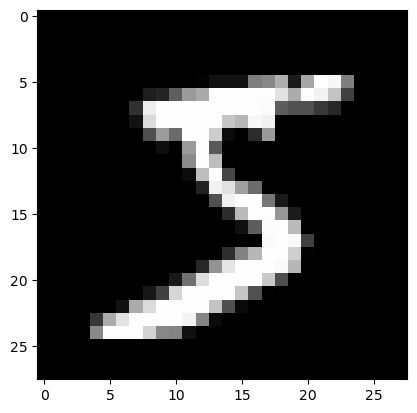

1/1 [==============================] - 0s 34ms/step
Predicted class: 5


In [7]:
# d) ESTIMATING THE MODEL'S PERFORMANCE ->
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

# Showing image at position [0] from dataset:
image = x_train[0]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

# Predicting the class of image:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class: {}".format(np.argmax(predict_model)))

313/313 [==============================] - 2s 6ms/step - loss: 0.0579 - accuracy: 0.9851
Loss=0.058
Accuracy=0.985


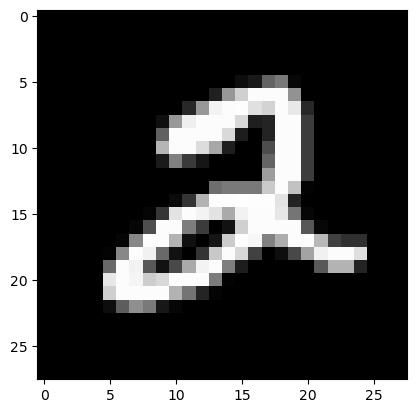

1/1 [==============================] - 0s 22ms/step
Predicted class: 2


In [8]:
# d) ESTIMATING THE MODEL'S PERFORMANCE ->
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

# Showing image at position [0] from dataset:
image = x_train[5]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

# Predicting the class of image:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class: {}".format(np.argmax(predict_model)))